In [15]:
%matplotlib inline
import numpy as np
import pylab as plt
np.set_printoptions(threshold=np.inf)

from matplotlib import rcParams
rcParams['font.size'] = '30'
rcParams['mathtext.default']='rm'
rcParams['figure.autolayout']='True'
rcParams['axes.labelsize'] = '30'
rcParams['xtick.labelsize'] = '30'
rcParams['ytick.labelsize'] = '30'
rcParams['legend.fontsize'] = '30'

In [2]:
#modules for inspiral uncertainty
import fits.skyloc as skyloc
import fits.dl as dl
import fits.mchirp as mchirp
import fits.mass_ratio as mass_ratio

In [3]:
#modules for inspiral uncertainty with LISa degraded sensitivity
import fits.skyloc_degraded as skyloc_degraded
import fits.dl_degraded as dl_degraded
import fits.mchirp_degraded as mchirp_degraded
import fits.mass_ratio_degraded as mass_ratio_degraded

In [4]:
#modules for merger uncertainties
import fits.skyloc_merger as skyloc_merger
import fits.skyloc_merger_degraded as skyloc_merger_degraded
import fits.dl_merger as dl_merger
import fits.dl_merger_degraded as dl_merger_degraded

In [5]:
def get_index_data(mtot_list, z_list, mtot_value, z_value):
    index_mtot = mtot_list.index(mtot_value)
    index_z = z_list.index(z_value)
    
    return index_mtot * 7 + index_z

In [6]:
def get_median_skyloc_dl(data_list):
    return data_list[2:9]

def get_68lower_skyloc_dl(data_list):
    return data_list[10:17]

def get_68upper_skyloc_dl(data_list):
    return data_list[18:25]

def get_95lower_skyloc_dl(data_list):
    return data_list[26:33]

def get_95upper_skyloc_dl(data_list):
    return data_list[34:41]


def get_median_mchirp_massratio(data_list):
    return data_list[2:9]

def get_68lower_mchirp_massratio(data_list):
    return data_list[9:16]

def get_68upper_mchirp_massratio(data_list):
    return data_list[16:23]

def get_95lower_mchirp_massratio(data_list):
    return data_list[23:30]

def get_95upper_mchirp_massratio(data_list):
    return data_list[30:37]

In [7]:
#some useful quantities
minute = 60.
hour = minute * 60.
day = hour * 24.
week = day * 7.
month = day * 30.
from_radian_to_degree = 180/np.pi
rad_to_deg_sq = from_radian_to_degree*from_radian_to_degree
mtots = [1.e5, 3.e5, 5.e5, 7.5e5, 1.e6, 3.e6, 5.e6, 7.5e6, 1.e7, 3.e7]
zs = [0.1, 0.3, 0.5, 1, 2, 3, 4]
times = [np.log10(month), np.log10(week), np.log10(3.*day), np.log10(day), np.log10(10.*hour), np.log10(5.*hour), np.log10(hour)]
time = np.linspace(np.log10(month), np.log10(hour), 10)
color_95 = 'mediumseagreen'
color_68 = 'dodgerblue'

In [14]:
#load the full set of data
data_skyloc = np.loadtxt('sky_loc.txt')
data_dl = np.loadtxt('dl.txt')
data_mchirp = np.loadtxt('mchirp.txt')
data_mass_ratio = np.loadtxt('mass_ratio.txt')
data_SNR = np.loadtxt('SNR.txt')

In [9]:
# let's get the data for a MBHB with mtot = 10^6 \msun at z=1
mtot = 3.e6
logmtot = np.log10(mtot)
z = 1
index = get_index_data(mtots, zs, mtot, z)
data_area_test = data_skyloc[index]
data_dl_test = data_dl[index]
data_mchirp_test = data_mchirp[index]
data_mass_ratio_test = data_mass_ratio[index]

#----------- sky position --------------------
data_area_median = get_median_skyloc_dl(data_area_test)
data_area_68lower = get_68lower_skyloc_dl(data_area_test)
data_area_68upper = get_68upper_skyloc_dl(data_area_test)
data_area_95lower = get_95lower_skyloc_dl(data_area_test)
data_area_95upper = get_95upper_skyloc_dl(data_area_test)

#---------- dl -------------------------------
data_dl_median = get_median_skyloc_dl(data_dl_test)
data_dl_68lower = get_68lower_skyloc_dl(data_dl_test)
data_dl_68upper = get_68upper_skyloc_dl(data_dl_test)
data_dl_95lower = get_95lower_skyloc_dl(data_dl_test)
data_dl_95upper = get_95upper_skyloc_dl(data_dl_test)

#---------- chirp mass -----------------------
data_mchirp_median = get_median_mchirp_massratio(data_mchirp_test)
data_mchirp_68lower = get_68lower_mchirp_massratio(data_mchirp_test)
data_mchirp_68upper = get_68upper_mchirp_massratio(data_mchirp_test)
data_mchirp_95lower = get_95lower_mchirp_massratio(data_mchirp_test)
data_mchirp_95upper = get_95upper_mchirp_massratio(data_mchirp_test)

#---------- mass-ratio -----------------------
data_mass_ratio_median = get_median_mchirp_massratio(data_mass_ratio_test)
data_mass_ratio_68lower = get_68lower_mchirp_massratio(data_mass_ratio_test)
data_mass_ratio_68upper = get_68upper_mchirp_massratio(data_mass_ratio_test)
data_mass_ratio_95lower = get_95lower_mchirp_massratio(data_mass_ratio_test)
data_mass_ratio_95upper = get_95upper_mchirp_massratio(data_mass_ratio_test)


/usr/lib/python3/dist-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


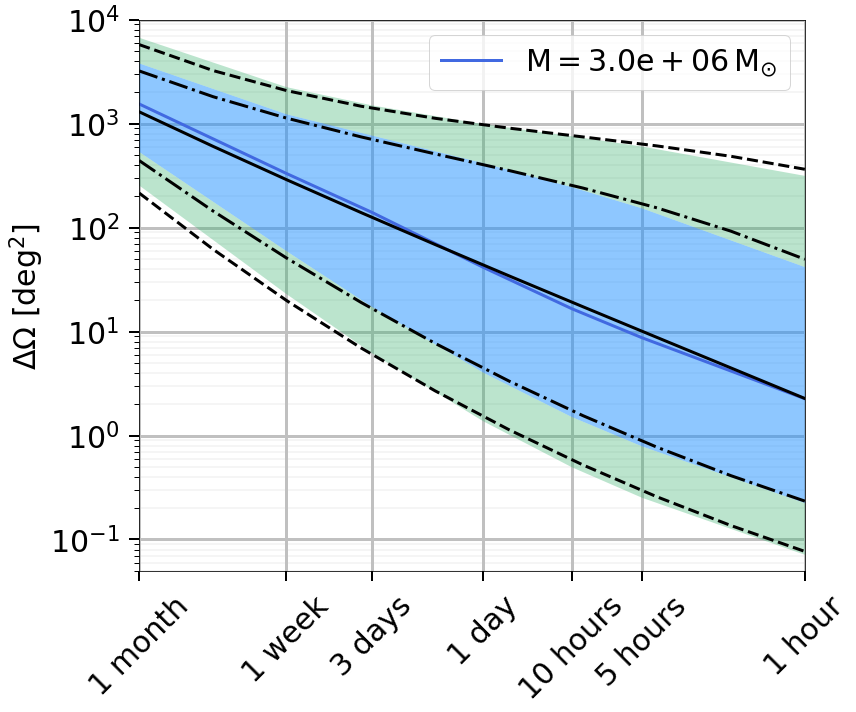

In [10]:
fig, ax = plt.subplots(figsize=(12.0,10.))
ax.set_axisbelow(True)
ax.grid(b=True, which='major', color='silver', linewidth='3', linestyle='-')
ax.grid(b=True, which='minor', color='silver', linewidth='0.3', linestyle='-')

ax.set_yscale('log')
ax.set_ylim([5.e-2, 1.e4])
ax.set_ylabel(r'$\Delta \Omega \,\, [deg^2] $')
ax.set_xlim([np.log10(hour),np.log10(month)])
ax.set_xlim(ax.get_xlim()[::-1])

ax.set_xticks(times)
labels=[item.get_text() for item in ax.get_xticklabels()]
labels[0] = r'1 month'
labels[1] = r'1 week'
labels[2] = r'3 days'
labels[3] = r'1 day'
labels[4] = r'10 hours'
labels[5] = r'5 hours'
labels[6] = r'1 hour' 
ax.set_xticklabels(labels, rotation = 45)
ax.tick_params(which = 'major', length = 10, width = 2, pad = 10)
ax.tick_params(which = 'minor', length = 5, width = 1, pad = 5)

ax.plot(times, data_area_median, linewidth = 3, color = 'royalblue', label = r'$M = %.1e \, M_{\odot}$' %(mtot))
ax.fill_between(times, data_area_68lower, data_area_68upper, facecolor=color_68, alpha = 0.5)
ax.fill_between(times, data_area_68upper, data_area_95upper, facecolor=color_95, alpha = 0.35)
ax.fill_between(times, data_area_95lower, data_area_68lower, facecolor=color_95, alpha = 0.35)

area_test = 10**( skyloc.median(time, logmtot, z) )
ax.plot(time, area_test * rad_to_deg_sq, linewidth = 3, ls = '-', color = 'black')
area_test = 10**( skyloc.quantile_68lower(time, logmtot, z) )
ax.plot(time, area_test * rad_to_deg_sq, linewidth = 3, ls = '-.', color = 'black')
area_test = 10**( skyloc.quantile_68upper(time, logmtot, z) )
ax.plot(time, area_test * rad_to_deg_sq, linewidth = 3, ls = '-.', color = 'black')
area_test = 10**( skyloc.quantile_95lower(time, logmtot, z) )
ax.plot(time, area_test * rad_to_deg_sq, linewidth = 3, ls = '--', color = 'black')
area_test = 10**( skyloc.quantile_95upper(time, logmtot, z) )
ax.plot(time, area_test * rad_to_deg_sq, linewidth = 3, ls = '--', color = 'black')

ax.legend(loc=1)

/usr/lib/python3/dist-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


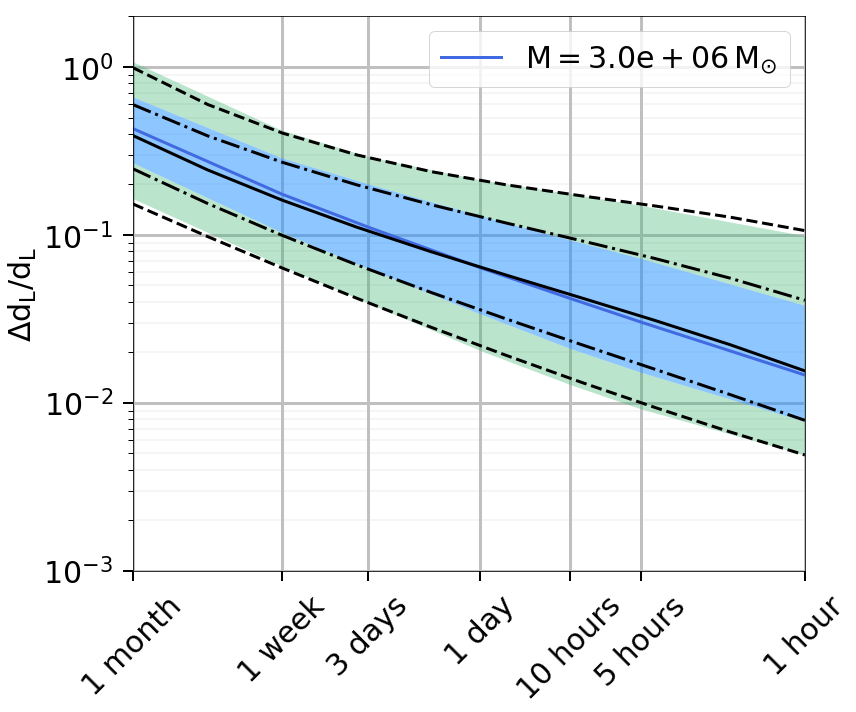

In [11]:
fig, ax = plt.subplots(figsize=(12.0,10.))
ax.set_axisbelow(True)
ax.grid(b=True, which='major', color='silver', linewidth='3', linestyle='-')
ax.grid(b=True, which='minor', color='silver', linewidth='0.3', linestyle='-')

ax.set_yscale('log')
ax.set_ylim([1.e-3, 2])
ax.set_ylabel(r'$\Delta d_L/d_L$')
ax.set_xlim([np.log10(hour),np.log10(month)])
ax.set_xlim(ax.get_xlim()[::-1])

ax.set_xticks(times)
labels=[item.get_text() for item in ax.get_xticklabels()]
labels[0] = r'1 month'
labels[1] = r'1 week'
labels[2] = r'3 days'
labels[3] = r'1 day'
labels[4] = r'10 hours'
labels[5] = r'5 hours'
labels[6] = r'1 hour' 
ax.set_xticklabels(labels, rotation = 45)
ax.tick_params(which = 'major', length = 10, width = 2, pad = 10)
ax.tick_params(which = 'minor', length = 5, width = 1, pad = 5)

ax.plot(times, data_dl_median, linewidth = 3, color = 'royalblue', label = r'$M = %.1e \, M_{\odot}$' %(mtot))
ax.fill_between(times, data_dl_68lower, data_dl_68upper, facecolor=color_68, alpha = 0.5)
ax.fill_between(times, data_dl_68upper, data_dl_95upper, facecolor=color_95, alpha = 0.35)
ax.fill_between(times, data_dl_95lower, data_dl_68lower, facecolor=color_95, alpha = 0.35)

dl_test = 10**( dl.median(time, logmtot, z) )
ax.plot(time, dl_test, linewidth = 3, ls = '-', color = 'black')
dl_test = 10**( dl.quantile_68lower(time, logmtot, z) )
ax.plot(time, dl_test, linewidth = 3, ls = '-.', color = 'black')
dl_test = 10**( dl.quantile_68upper(time, logmtot, z) )
ax.plot(time, dl_test, linewidth = 3, ls = '-.', color = 'black')
dl_test = 10**( dl.quantile_95lower(time, logmtot, z) )
ax.plot(time, dl_test, linewidth = 3, ls = '--', color = 'black')
dl_test = 10**( dl.quantile_95upper(time, logmtot, z) )
ax.plot(time, dl_test, linewidth = 3, ls = '--', color = 'black')

ax.legend(loc=1)

/usr/lib/python3/dist-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


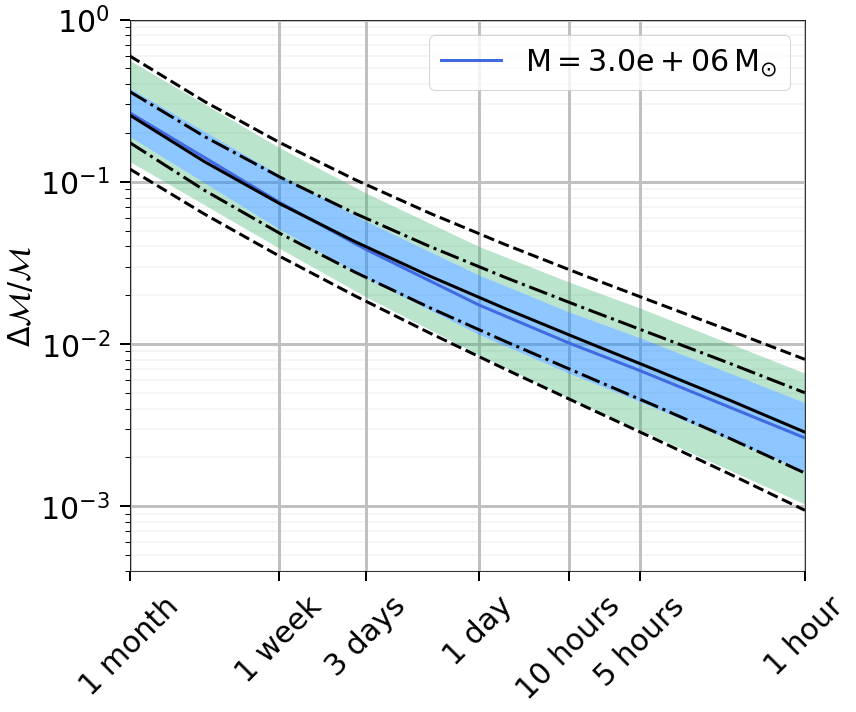

In [12]:
fig, ax = plt.subplots(figsize=(12.0,10.))
ax.set_axisbelow(True)
ax.grid(b=True, which='major', color='silver', linewidth='3', linestyle='-')
ax.grid(b=True, which='minor', color='silver', linewidth='0.3', linestyle='-')

ax.set_yscale('log')
ax.set_ylim([4.e-4, 1])
ax.set_ylabel(r'$\Delta \mathcal{M}/\mathcal{M} $')
ax.set_xlim([np.log10(hour),np.log10(month)])
ax.set_xlim(ax.get_xlim()[::-1])

ax.set_xticks(times)
labels=[item.get_text() for item in ax.get_xticklabels()]
labels[0] = r'1 month'
labels[1] = r'1 week'
labels[2] = r'3 days'
labels[3] = r'1 day'
labels[4] = r'10 hours'
labels[5] = r'5 hours'
labels[6] = r'1 hour' 
ax.set_xticklabels(labels, rotation = 45)
ax.tick_params(which = 'major', length = 10, width = 2, pad = 10)
ax.tick_params(which = 'minor', length = 5, width = 1, pad = 5)

ax.plot(times, data_mchirp_median, linewidth = 3, color = 'royalblue', label = r'$M = %.1e \, M_{\odot}$' %(mtot))
ax.fill_between(times, data_mchirp_68lower, data_mchirp_68upper, facecolor=color_68, alpha = 0.5)
ax.fill_between(times, data_mchirp_68upper, data_mchirp_95upper, facecolor=color_95, alpha = 0.35)
ax.fill_between(times, data_mchirp_95lower, data_mchirp_68lower, facecolor=color_95, alpha = 0.35)

mchirp_test = 10**( mchirp.median(time, logmtot, z) )
ax.plot(time, mchirp_test, linewidth = 3, ls = '-', color = 'black')
mchirp_test = 10**( mchirp.quantile_68lower(time, logmtot, z) )
ax.plot(time, mchirp_test, linewidth = 3, ls = '-.', color = 'black')
mchirp_test = 10**( mchirp.quantile_68upper(time, logmtot, z) )
ax.plot(time, mchirp_test, linewidth = 3, ls = '-.', color = 'black')
mchirp_test = 10**( mchirp.quantile_95lower(time, logmtot, z) )
ax.plot(time, mchirp_test, linewidth = 3, ls = '--', color = 'black')
mchirp_test = 10**( mchirp.quantile_95upper(time, logmtot, z) )
ax.plot(time, mchirp_test, linewidth = 3, ls = '--', color = 'black')

ax.legend(loc=1)

/usr/lib/python3/dist-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


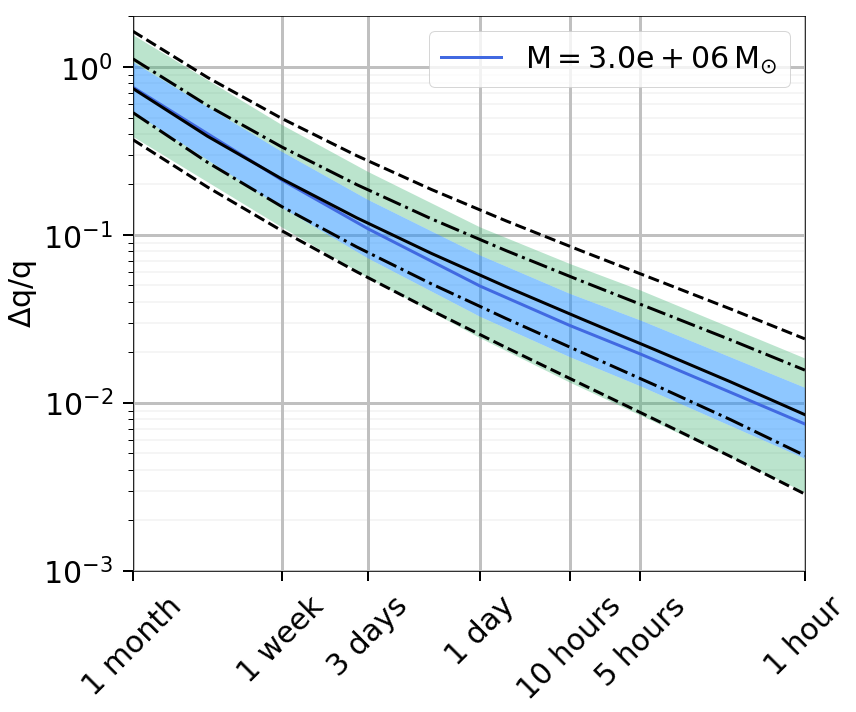

In [13]:
fig, ax = plt.subplots(figsize=(12.0,10.))
ax.set_axisbelow(True)
ax.grid(b=True, which='major', color='silver', linewidth='3', linestyle='-')
ax.grid(b=True, which='minor', color='silver', linewidth='0.3', linestyle='-')

ax.set_yscale('log')
ax.set_ylim([1.e-3, 2.])
ax.set_ylabel(r'$\Delta q/q $')
ax.set_xlim([np.log10(hour),np.log10(month)])
ax.set_xlim(ax.get_xlim()[::-1])

ax.set_xticks(times)
labels=[item.get_text() for item in ax.get_xticklabels()]
labels[0] = r'1 month'
labels[1] = r'1 week'
labels[2] = r'3 days'
labels[3] = r'1 day'
labels[4] = r'10 hours'
labels[5] = r'5 hours'
labels[6] = r'1 hour' 
ax.set_xticklabels(labels, rotation = 45)
ax.tick_params(which = 'major', length = 10, width = 2, pad = 10)
ax.tick_params(which = 'minor', length = 5, width = 1, pad = 5)

ax.plot(times, data_mass_ratio_median, linewidth = 3, color = 'royalblue', label = r'$M = %.1e \, M_{\odot}$' %(mtot))
ax.fill_between(times, data_mass_ratio_68lower, data_mass_ratio_68upper, facecolor=color_68, alpha = 0.5)
ax.fill_between(times, data_mass_ratio_68upper, data_mass_ratio_95upper, facecolor=color_95, alpha = 0.35)
ax.fill_between(times, data_mass_ratio_95lower, data_mass_ratio_68lower, facecolor=color_95, alpha = 0.35)

mass_ratio_test = 10**( mass_ratio.median(time, logmtot, z) )
ax.plot(time, mass_ratio_test, linewidth = 3, ls = '-', color = 'black')
mass_ratio_test = 10**( mass_ratio.quantile_68lower(time, logmtot, z) )
ax.plot(time, mass_ratio_test, linewidth = 3, ls = '-.', color = 'black')
mass_ratio_test = 10**( mass_ratio.quantile_68upper(time, logmtot, z) )
ax.plot(time, mass_ratio_test, linewidth = 3, ls = '-.', color = 'black')
mass_ratio_test = 10**( mass_ratio.quantile_95lower(time, logmtot, z) )
ax.plot(time, mass_ratio_test, linewidth = 3, ls = '--', color = 'black')
mass_ratio_test = 10**( mass_ratio.quantile_95upper(time, logmtot, z) )
ax.plot(time, mass_ratio_test, linewidth = 3, ls = '--', color = 'black')

ax.legend(loc=1)